In [106]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from pytorchvideo.data.encoded_video import EncodedVideo
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch.optim as optim
from tqdm import tqdm
import sys

%run objects
%run models

In [130]:
train_dataset = ContactDataset(os.getcwd() + "/nfl-player-contact-detection/train_labels.csv",
                      ground=False, feature_size=256, num_back_forward_steps=1, skips=1, distance_cutoff=5, num_per_classification=10000)

Data Sample Contains 20000 observations.


In [131]:
train_dataset._cache_all_features

----Features being extracted for 239 plays and 20000 potential contacts-----


  0%|          | 0/239 [00:04<?, ?it/s]


KeyError: 635

tensor([1.])


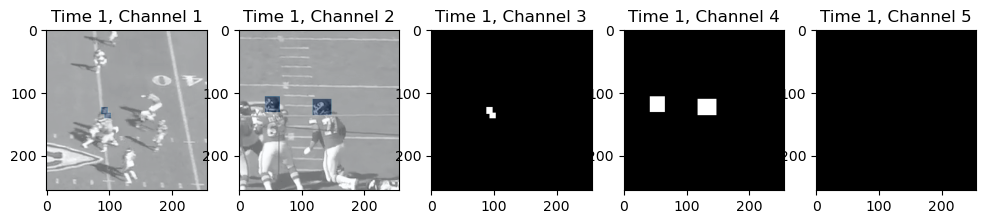

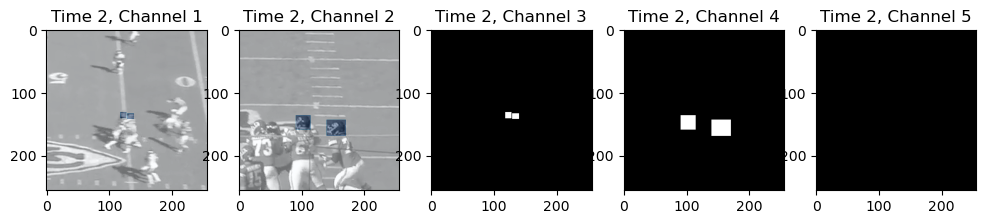

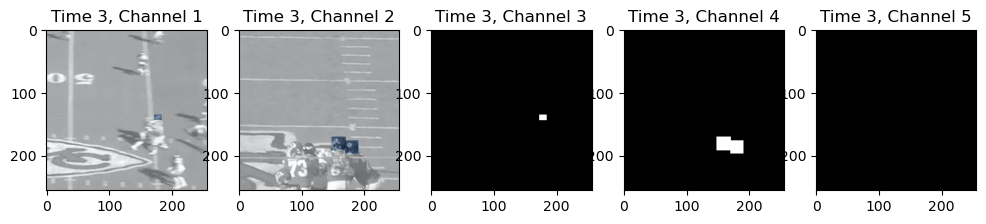

In [129]:
images=train_dataset[2]
j = 0
for image in images[0]:
    j+=1
    fig, axs = plt.subplots(1, 5, figsize=(12, 4)) 
    for i in range(5):
        channel = image[i, :, :]
        axs[i].imshow(channel, cmap='gray') 
        if i==0 or i==1:
            axs[i].imshow(image[i+2, :, :], alpha=0.4, cmap='Blues')  
        axs[i].set_title(f'Time {j}, Channel {i+1}')
print(images[1])

In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from pytorchvideo.data.encoded_video import EncodedVideo
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch.optim as optim
from tqdm import tqdm
import sys
import psutil

/Users/nickbachelder/opt/anaconda3/envs/data-science/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from pytorchvideo.data.encoded_video import EncodedVideo
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch.optim as optim
from tqdm import tqdm
import sys
import psutil

%run objects
%run models

print(f"-----Caching features and labels-----")
dataset = ContactDataset(os.getcwd() + "/nfl-player-contact-detection/train_labels.csv",
                      ground=False, feature_size=256, num_back_forward_steps=1, skips=1, distance_cutoff=5, num_per_classification=5)
for index, row in tqdm(dataset.record_df.iterrows(), total=dataset.record_df.shape[0]):
    load=dataset[index] # Caches info internally in dataset object

-----Caching features and labels-----
Data Sample Contains 10 observations.


  0%|          | 0/10 [00:04<?, ?it/s]

CPU Usage: 20.8 %
Memory Usage:
Total Memory: 8.0 GB
Available Memory: 0.296234130859375 GB
Used Memory: 0.7298736572265625 GB
Memory Percent: 96.3 %


AccessDenied: 

In [3]:
dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

In [4]:
image_size = 256
input_size = 100  # Output size of the Encoder's fully connected layer
hidden_size = 64
num_layers = 2
dropout = 0.1
learning_rate = 0.001
num_epochs = 10

In [69]:
combined_model = ContactNet(image_size, input_size, hidden_size, num_layers, dropout)
device = torch.device('cpu')
combined_model.to(device)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(combined_model.parameters(), lr=learning_rate)

In [72]:
for epoch in range(num_epochs):
    # Training loop
    combined_model.train()
    for batch_idx, (features, labels) in enumerate(dataloader):
        x1, x2, x3 = features
        # Forward pass
        outputs = combined_model(x1, x2, x3)

        loss = criterion(outputs.squeeze(), labels.squeeze().float())  # Compute loss
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(dataloader)}], Loss: {loss.item():.4f}')
        # Print loss
        if (batch_idx + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(dataloader)}], Loss: {loss.item():.4f}')

Epoch [1/10], Batch [1/1], Loss: 0.4257
Epoch [2/10], Batch [1/1], Loss: 0.3891
Epoch [3/10], Batch [1/1], Loss: 0.3652
Epoch [4/10], Batch [1/1], Loss: 0.3354
Epoch [5/10], Batch [1/1], Loss: 0.3033
Epoch [6/10], Batch [1/1], Loss: 0.2683
Epoch [7/10], Batch [1/1], Loss: 0.2396
Epoch [8/10], Batch [1/1], Loss: 0.2198
Epoch [9/10], Batch [1/1], Loss: 0.1947
Epoch [10/10], Batch [1/1], Loss: 0.1662


In [34]:
pd.read_csv(os.getcwd() + "/nfl-player-contact-detection/train_labels.csv").sort_values(by="game_play")

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact
0,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0
11798,58168_003392_46_37084_46522,58168_003392,2020-09-11T03:01:52.700Z,46,37084,46522,0
11799,58168_003392_46_44869_47944,58168_003392,2020-09-11T03:01:52.700Z,46,44869,47944,0
11800,58168_003392_46_44869_47837,58168_003392,2020-09-11T03:01:52.700Z,46,44869,47837,0
11801,58168_003392_46_44869_46137,58168_003392,2020-09-11T03:01:52.700Z,46,44869,46137,0
...,...,...,...,...,...,...,...
4706095,58582_003121_30_46105_46121,58582_003121,2021-10-12T02:42:23.000Z,30,46105,46121,0
4706094,58582_003121_30_46105_52609,58582_003121,2021-10-12T02:42:23.000Z,30,46105,52609,0
4706093,58582_003121_30_45287_52619,58582_003121,2021-10-12T02:42:23.000Z,30,45287,52619,0
4706091,58582_003121_30_45287_47906,58582_003121,2021-10-12T02:42:23.000Z,30,45287,47906,0


In [6]:
import glob

In [17]:
read_video(id='58168_003392', view="Sideline", type='train').shape

(711, 720, 1280)

In [15]:
train_info

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact,frame
0,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0,299
1,58168_003392_0_38590_41257,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41257,0,299
2,58168_003392_0_38590_41944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41944,0,299
3,58168_003392_0_38590_42386,58168_003392,2020-09-11T03:01:48.100Z,0,38590,42386,0,299
4,58168_003392_0_38590_47944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,47944,0,299
...,...,...,...,...,...,...,...,...
4721613,58582_003121_91_48220_G,58582_003121,2021-10-12T02:42:29.100Z,91,48220,G,0,845
4721614,58582_003121_91_47906_G,58582_003121,2021-10-12T02:42:29.100Z,91,47906,G,0,845
4721615,58582_003121_91_38557_G,58582_003121,2021-10-12T02:42:29.100Z,91,38557,G,0,845
4721616,58582_003121_91_47872_G,58582_003121,2021-10-12T02:42:29.100Z,91,47872,G,0,845


In [14]:
helmet = pd.read_csv("/Users/nickbachelder/Desktop/Personal Code/Kaggle/Contact/nfl-player-contact-detection/train_baseline_helmets.csv")
train_info = pd.read_csv("/Users/nickbachelder/Desktop/Personal Code/Kaggle/Contact/nfl-player-contact-detection/train_labels.csv")
tracking = pd.read_csv("/Users/nickbachelder/Desktop/Personal Code/Kaggle/Contact/nfl-player-contact-detection/train_player_tracking.csv")
train_info['frame'] = list(map(step_to_frame, train_info.step))

In [85]:
train_info.loc[train_info.contact==1]

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact,frame
809,58168_003392_3_41944_42565,58168_003392,2020-09-11T03:01:48.400Z,3,41944,42565,1,317
1062,58168_003392_4_41944_42565,58168_003392,2020-09-11T03:01:48.500Z,4,41944,42565,1,323
1163,58168_003392_4_37084_38567,58168_003392,2020-09-11T03:01:48.500Z,4,37084,38567,1,323
1289,58168_003392_5_43854_46445,58168_003392,2020-09-11T03:01:48.600Z,5,43854,46445,1,329
1315,58168_003392_5_41944_42565,58168_003392,2020-09-11T03:01:48.600Z,5,41944,42565,1,329
...,...,...,...,...,...,...,...,...
4720589,58582_003121_87_39971_G,58582_003121,2021-10-12T02:42:28.700Z,87,39971,G,1,821
4720842,58582_003121_88_39971_G,58582_003121,2021-10-12T02:42:28.800Z,88,39971,G,1,827
4721095,58582_003121_89_39971_G,58582_003121,2021-10-12T02:42:28.900Z,89,39971,G,1,833
4721348,58582_003121_90_39971_G,58582_003121,2021-10-12T02:42:29.000Z,90,39971,G,1,839


In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from pytorchvideo.data.encoded_video import EncodedVideo
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch.optim as optim
from tqdm import tqdm
from objects import step_to_frame, create_boxes_dict, ContactDataset
from models import Encoder, LSTMModel, ContactNet
import torch
import torch.nn as nn
import torch.nn.functional as F

if torch.cuda.is_available():
    device = torch.device("cuda")  # Use GPU
    print("CUDA is available! Using GPU.")
else:
    device = torch.device("cpu")  # Use CPU
    print("CUDA is not available. Using CPU.")

print("---Loading Train Dataloader----")
dataset = ContactDataset(os.getcwd() + "/nfl-player-contact-detection/train_labels.csv",
                      ground=False, feature_size=256, num_back_forward_steps=1, skips=1, distance_cutoff=5, num_per_classification=10)
dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

image_size = 128
input_size = 100  # Output size of the Encoder's fully connected layer
hidden_size = 64
num_layers = 2
dropout = 0.1
learning_rate = 0.001
num_epochs = 10

print("---Initializing Model----")
combined_model = ContactNet(image_size, input_size, hidden_size, num_layers, dropout)
combined_model.to(device)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(combined_model.parameters(), lr=learning_rate)


print("---Training----")
for epoch in range(num_epochs):
    # Training loop
    combined_model.train()
    print(f"---Epoch {epoch}----")
    for batch_idx, (features, labels) in enumerate(dataloader):
        print(f"Batch {batch_idx}")
        x1, x2, x3, x4, x5 = features
        x1, x2, x3, x4, x5, labels = x1.to(device), x2.to(device), x3.to(device), x4.to(device), x5.to(device), labels.to(device)
        # Forward pass
        outputs = combined_model(x1, x2, x3, x4, x5)
        loss = criterion(outputs.squeeze(), labels.float())  # Compute loss
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print loss
        if (batch_idx + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(dataloader)}], Loss: {loss.item():.4f}')

/Users/nickbachelder/opt/anaconda3/envs/data-science/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CUDA is not available. Using CPU.
---Loading Train Dataloader----
Data Sample Contains 20 observations.
---Initializing Model----
---Training----
---Epoch 0----
Batch 0


ValueError: not enough values to unpack (expected 5, got 3)